#  Loading and plotting data

This tutorial shows how to load data outputted by Vicon Nexus (a CSV file) and plot it using `matplotlib`.

## Imports

First, for convenience, let's load some `Jupyter` extensions:

In [1]:
%load_ext autoreload
%autoreload 2

Now we import `matplotlib`:

In [2]:
import matplotlib.pyplot as plt

And `pathlib.Path`, which we use to find the dataset:

In [3]:
from pathlib import Path

Finally, we import `load_vicon_file`:

In [4]:
from muscle_synergies import load_vicon_file

## Loading the data

We get the location of the dataset:

In [5]:
cwd = Path().resolve()
data_dir = cwd / '..' / '..' / '..' / 'sample_data'
abridged_dataset = data_dir / 'abridged_data.csv' # useful for testing
full_dataset = data_dir / 'dynamic_trial.csv'
dataset = full_dataset.resolve()

And load it:

In [6]:
vicon_data = load_vicon_file(dataset)

## Understanding the structure of the data

`load_vicon_file` returns a `ViconNexusData` object, which has 3 members:
+ `forcepl`: a list containing the different force plate devices
+ `emg`: a single device containing all the EMG data
+ `traj`: a list containing the different trajectory tracking devices

`ViconNexusData.describe()` returns a `str` with a summary of the loaded contents:

In [7]:
print(vicon_data.describe())

ViconNexusData:
+ emg: 8 columns
+ forcepl (2 devices): DeviceData("Imported AMTI OR6 Series Force Plate #1"), DeviceData("Imported AMTI OR6 Series Force Plate #2")
+ traj (40 devices): DeviceData("Angelica:HV"), ..., DeviceData("Angelica:ELAST_DP")


Now let's focus on a single one of those devices, specifically, the one containing the EMG data. 
The data for each device is contained in a `DeviceData` object:

In [8]:
emg_dev = vicon_data.emg
emg_dev

<DeviceData("EMG2000 - Voltage")>

The name is stored in the `DeviceData.name` member:

In [9]:
emg_dev.name

'EMG2000 - Voltage'

The sampling rate at which the data was measured can be accessed via the `DeviceData.sampling_frequency` member (in Hz):

In [10]:
emg_dev.sampling_frequency

2000

Finally, the data itself is stored as a `pandas.DataFrame` in the `DeviceData.df` member. Below, the first 3 rows of the EMG data are shown:

In [11]:
emg_df = emg_dev.df
emg_df.iloc[:3]

,VL,RF,GMED,TFL,GMAXS,GMAXI,BF,ST
0,0.003724,0.007224,0.003441,0.001500,-0.000798,-0.001960,-0.006023,-0.002324
1,0.004639,0.004782,0.002068,0.000889,-0.000036,-0.001503,-0.003735,-0.003697
2,0.004487,0.001425,0.000389,-0.000026,-0.000798,-0.002418,0.001911,-0.005376


The units of each column of data can be accessed via `DeviceData.units`:

In [12]:
emg_dev.units

('V', 'V', 'V', 'V', 'V', 'V', 'V', 'V')

We can get a statistical summary of the data by using `pandas.DataFrame.describe()`:

In [13]:
emg_df.describe()

,VL,RF,GMED,TFL,GMAXS,GMAXI,BF,ST
count,124460.000000,124460.000000,124460.000000,124460.000000,124460.000000,124460.000000,124460.000000,124460.000000
mean,-0.000085,0.000460,0.000941,0.001530,-0.000530,0.000279,0.000968,0.000506
std,0.007732,0.008471,0.018514,0.028568,0.028422,0.020501,0.005045,0.020447
min,-0.058990,-0.051218,-0.194007,-0.288875,-0.312993,-0.225196,-0.062786,-0.189397
25%,-0.004058,-0.003610,-0.004799,-0.005825,-0.007970,-0.006233,-0.001446,-0.007817
50%,0.000062,0.000357,0.000847,0.001042,0.000422,0.001091,0.000996,0.001491
75%,0.004029,0.004324,0.005883,0.007298,0.009577,0.008416,0.003437,0.010493
max,0.053772,0.075125,0.283898,0.396855,0.226863,0.156731,0.074848,0.130275


## Plotting

Let's now plot the EMG data of the vastus lateralis muscle (`"VL"` in the `pandas.DataFrame`).
First, we set the style we'll use for our plots:

In [14]:
plt.style.use('bmh')

The x axis of our plot will contain the time (in seconds) in which the measurements occurred.
To get those times, we use `DeviceData.time_seq()`:

In [15]:
time_seq = emg_dev.time_seq()
time_seq[:3]

0    0.0005
1    0.0010
2    0.0015
dtype: float64

Now we can plot the signal:

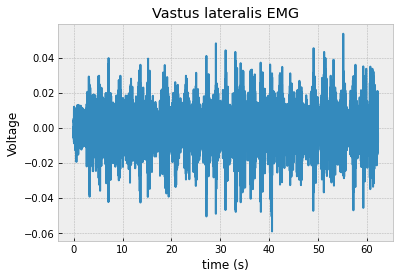

In [16]:
plt.plot(time_seq, emg_df['VL'])
plt.title('Vastus lateralis EMG')
plt.xlabel('time (s)')
plt.ylabel('Voltage')
plt.show()

## Other device types

We'll now briefly take a look at the data for other types of device.

### Force plate

The different force plates are stored as a list in `ViconNexusData.forcepl`.
We grab the first one:

In [17]:
forcepl_dev = vicon_data.forcepl[0]
forcepl_dev

<DeviceData("Imported AMTI OR6 Series Force Plate #1")>

Let's take a look at the data itself:

In [18]:
forcepl_df = forcepl_dev.df
forcepl_df[:7]

,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz
0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,254.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,232.0,254.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,232.0,254.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,232.0,254.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,232.0,254.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,232.0,254.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,232.0,254.0,0.0


Find out its units:

In [19]:
forcepl_dev.units

('N', 'N', 'N', 'N.mm', 'N.mm', 'N.mm', 'mm', 'mm', 'mm')

Finally, we plot the measured force (its z-component):

Text(0, 0.5, 'Force 1 (N), z component')

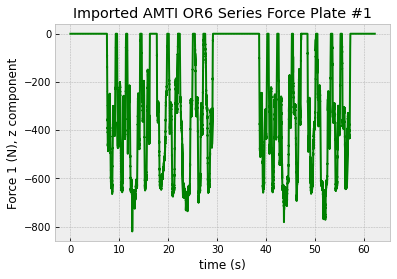

In [20]:
plt.plot(forcepl_dev.time_seq(),
         forcepl_df['Fz'], 'g')
plt.title(forcepl_dev.name) 
plt.xlabel('time (s)')
plt.ylabel('Force 1 (N), z component')

### A trajectory tracking device

We pick the first of the devices contained in `DeviceData.traj`:

In [21]:
traj_dev = vicon_data.traj[0]
traj_dev

<DeviceData("Angelica:HV")>

Take a look at the `pandas.DataFrame`:

In [22]:
traj_df = traj_dev.df
traj_df[:7]

,X,Y,Z
0,209.331,1219.74,1780.67
1,209.475,1219.82,1780.88
2,209.635,1219.94,1780.98
3,209.887,1220.33,1782.55
4,210.031,1220.34,1782.51
5,210.200,1220.36,1782.64
6,210.353,1220.02,1781.56


Check the units:

In [23]:
traj_dev.units

('mm', 'mm', 'mm')

And plot the data

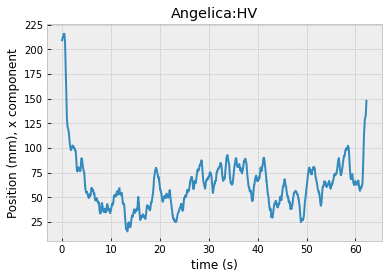

In [24]:
plt.plot(traj_dev.time_seq(), traj_df['X'])
plt.title(traj_dev.name) 
plt.xlabel('time (s)')
plt.ylabel('Position (mm), x component')
plt.show()